# 1. Introduction

Nama : Rafif Dwiputra

Batch : FTDS-RMT-016

Dataset : Vegetable Image Dataset

Objective : To detect the image of vegetable

In [ ]:
!mkdir -p ~/.kaggle #bikin folder di kaggle root
!cp kaggle.json ~/.kaggle # copy paster kaggle.json ke folder kaggle 

!mkdir ./kaggle #bikin folder kaggle di lokasi sama (bukan di root)
!mv ./kaggle.json ./kaggle #move atau pindahi file kaggle.json ke folder kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json #perizinan akses, hanya pemilik file yang memiliki akses baca dan tulis ke file
!ls ~/.kaggle #cek list data yang ada di folder kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

 97% 519M/534M [00:02<00:00, 206MB/s]
100% 534M/534M [00:02<00:00, 191MB/s]


In [ ]:
!unzip -q /content/vegetable-image-dataset.zip -d images

# 2. Library Import

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input

from google.colab import files
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [ ]:
os.listdir('/content/images/Vegetable Images')

['validation', 'test', 'train']

In [ ]:
main_path= '/content/images/Vegetable Images'

In [ ]:
train_dir = os.path.join(main_path, 'train')
test_dir = os.path.join(main_path, 'test')
val_dir = os.path.join(main_path, 'validation')

In [ ]:
print('train set: \n' + '='*50)
num_bean = len(os.listdir(os.path.join(train_dir, 'Bean')))
num_bitgourd = len(os.listdir(os.path.join(train_dir, 'Bitter_Gourd')))
num_botgourd = len(os.listdir(os.path.join(train_dir, 'Bottle_Gourd')))
num_brinjal = len(os.listdir(os.path.join(train_dir, 'Brinjal')))
num_broccoli = len(os.listdir(os.path.join(train_dir, 'Broccoli')))
num_cab = len(os.listdir(os.path.join(train_dir, 'Cabbage')))
num_cap = len(os.listdir(os.path.join(train_dir, 'Capsicum')))
num_car = len(os.listdir(os.path.join(train_dir, 'Carrot')))
num_cauli = len(os.listdir(os.path.join(train_dir, 'Cauliflower')))
num_cucum = len(os.listdir(os.path.join(train_dir, 'Cucumber')))
num_papaya = len(os.listdir(os.path.join(train_dir, 'Papaya')))
num_potato = len(os.listdir(os.path.join(train_dir, 'Potato')))
num_pump = len(os.listdir(os.path.join(train_dir, 'Pumpkin')))
num_radish = len(os.listdir(os.path.join(train_dir, 'Radish')))
num_tomato = len(os.listdir(os.path.join(train_dir, 'Tomato')))


print(f'jumlah bean= {num_bean}')
print(f'jumlah bitter gourd= {num_bitgourd}')
print(f'jumlah bottle gourd= {num_botgourd}')
print(f'jumlah brinjal = {num_brinjal}')
print(f'jumlah broccoli = {num_broccoli}')
print(f'jumlah cabbage = {num_cab}')
print(f'jumlah capsicum = {num_cap}')
print(f'jumlah carrot = {num_car}')
print(f'jumlah cauliflower = {num_cauli}')
print(f'jumlah cucumber= {num_cucum}')
print(f'jumlah papaya= {num_papaya}')
print(f'jumlah potato= {num_potato}')
print(f'jumlah pumpkin= {num_pump}')
print(f'jumlah radish= {num_radish}')
print(f'jumlah tomato= {num_tomato}')

train set: 
jumlah bean= 1000
jumlah bitter gourd= 1000
jumlah bottle gourd= 1000
jumlah brinjal = 1000
jumlah broccoli = 1000
jumlah cabbage = 1000
jumlah capsicum = 1000
jumlah carrot = 1000
jumlah cauliflower = 1000
jumlah cucumber= 1000
jumlah papaya= 1000
jumlah potato= 1000
jumlah pumpkin= 1000
jumlah radish= 1000
jumlah tomato= 1000


In [ ]:
print('test set: \n' + '='*50)
num_bean = len(os.listdir(os.path.join(test_dir, 'Bean')))
num_bitgourd = len(os.listdir(os.path.join(test_dir, 'Bitter_Gourd')))
num_botgourd = len(os.listdir(os.path.join(test_dir, 'Bottle_Gourd')))
num_brinjal = len(os.listdir(os.path.join(test_dir, 'Brinjal')))
num_broccoli = len(os.listdir(os.path.join(test_dir, 'Broccoli')))
num_cab = len(os.listdir(os.path.join(test_dir, 'Cabbage')))
num_cap = len(os.listdir(os.path.join(test_dir, 'Capsicum')))
num_car = len(os.listdir(os.path.join(test_dir, 'Carrot')))
num_cauli = len(os.listdir(os.path.join(test_dir, 'Cauliflower')))
num_cucum = len(os.listdir(os.path.join(test_dir, 'Cucumber')))
num_papaya = len(os.listdir(os.path.join(test_dir, 'Papaya')))
num_potato = len(os.listdir(os.path.join(test_dir, 'Potato')))
num_pump = len(os.listdir(os.path.join(test_dir, 'Pumpkin')))
num_radish = len(os.listdir(os.path.join(test_dir, 'Radish')))
num_tomato = len(os.listdir(os.path.join(test_dir, 'Tomato')))


print(f'jumlah bean= {num_bean}')
print(f'jumlah bitter gourd= {num_bitgourd}')
print(f'jumlah bottle gourd= {num_botgourd}')
print(f'jumlah brinjal = {num_brinjal}')
print(f'jumlah broccoli = {num_broccoli}')
print(f'jumlah cabbage = {num_cab}')
print(f'jumlah capsicum = {num_cap}')
print(f'jumlah carrot = {num_car}')
print(f'jumlah cauliflower = {num_cauli}')
print(f'jumlah cucumber= {num_cucum}')
print(f'jumlah papaya= {num_papaya}')
print(f'jumlah potato= {num_potato}')
print(f'jumlah pumpkin= {num_pump}')
print(f'jumlah radish= {num_radish}')
print(f'jumlah tomato= {num_tomato}')

test set: 
jumlah bean= 200
jumlah bitter gourd= 200
jumlah bottle gourd= 200
jumlah brinjal = 200
jumlah broccoli = 200
jumlah cabbage = 200
jumlah capsicum = 200
jumlah carrot = 200
jumlah cauliflower = 200
jumlah cucumber= 200
jumlah papaya= 200
jumlah potato= 200
jumlah pumpkin= 200
jumlah radish= 200
jumlah tomato= 200


In [ ]:
print('validation set: \n' + '='*50)
num_bean = len(os.listdir(os.path.join(val_dir, 'Bean')))
num_bitgourd = len(os.listdir(os.path.join(val_dir, 'Bitter_Gourd')))
num_botgourd = len(os.listdir(os.path.join(val_dir, 'Bottle_Gourd')))
num_brinjal = len(os.listdir(os.path.join(val_dir, 'Brinjal')))
num_broccoli = len(os.listdir(os.path.join(val_dir, 'Broccoli')))
num_cab = len(os.listdir(os.path.join(val_dir, 'Cabbage')))
num_cap = len(os.listdir(os.path.join(val_dir, 'Capsicum')))
num_car = len(os.listdir(os.path.join(val_dir, 'Carrot')))
num_cauli = len(os.listdir(os.path.join(val_dir, 'Cauliflower')))
num_cucum = len(os.listdir(os.path.join(val_dir, 'Cucumber')))
num_papaya = len(os.listdir(os.path.join(val_dir, 'Papaya')))
num_potato = len(os.listdir(os.path.join(val_dir, 'Potato')))
num_pump = len(os.listdir(os.path.join(val_dir, 'Pumpkin')))
num_radish = len(os.listdir(os.path.join(val_dir, 'Radish')))
num_tomato = len(os.listdir(os.path.join(val_dir, 'Tomato')))


print(f'jumlah bean= {num_bean}')
print(f'jumlah bitter gourd= {num_bitgourd}')
print(f'jumlah bottle gourd= {num_botgourd}')
print(f'jumlah brinjal = {num_brinjal}')
print(f'jumlah broccoli = {num_broccoli}')
print(f'jumlah cabbage = {num_cab}')
print(f'jumlah capsicum = {num_cap}')
print(f'jumlah carrot = {num_car}')
print(f'jumlah cauliflower = {num_cauli}')
print(f'jumlah cucumber= {num_cucum}')
print(f'jumlah papaya= {num_papaya}')
print(f'jumlah potato= {num_potato}')
print(f'jumlah pumpkin= {num_pump}')
print(f'jumlah radish= {num_radish}')
print(f'jumlah tomato= {num_tomato}')

validation set: 
jumlah bean= 200
jumlah bitter gourd= 200
jumlah bottle gourd= 200
jumlah brinjal = 200
jumlah broccoli = 200
jumlah cabbage = 200
jumlah capsicum = 200
jumlah carrot = 200
jumlah cauliflower = 200
jumlah cucumber= 200
jumlah papaya= 200
jumlah potato= 200
jumlah pumpkin= 200
jumlah radish= 200
jumlah tomato= 200


In [ ]:
train_bean = glob.glob(train_dir+"/Bean/*.jpg")
train_bitgourd = glob.glob(train_dir+"/Bitter_Gourd/*.jpg")
train_botgourd = glob.glob(train_dir+"/Bottle_Gourd/*.jpg")
train_brinjal = glob.glob(train_dir+"/Brinjal/*.jpg")
train_broccoli = glob.glob(train_dir+"/Broccoli/*.jpg")
train_cab = glob.glob(train_dir+"/Cabbage/*.jpg")
train_cap = glob.glob(train_dir+"/Capsicum/*.jpg")
train_car = glob.glob(train_dir+"/Carrot/*.jpg")
train_cauli = glob.glob(train_dir+"/Cauliflower/*.jpg")
train_cucum = glob.glob(train_dir+"/Cucumber/*.jpg")
train_papaya = glob.glob(train_dir+"/Papaya/*.jpg")
train_potato = glob.glob(train_dir+"/Potato/*.jpg")
train_pumpkin = glob.glob(train_dir+"/Pumpkin/*.jpg")
train_radish = glob.glob(train_dir+"/Radish/*.jpg")
train_tomato = glob.glob(train_dir+"/Tomato/*.jpg")

test_bean = glob.glob(test_dir+"/Bean/*.jpg")
test_bitgourd = glob.glob(test_dir+"/Bitter_Gourd/*.jpg")
test_botgourd = glob.glob(test_dir+"/Bottle_Gourd/*.jpg")
test_brinjal = glob.glob(test_dir+"/Brinjal/*.jpg")
test_broccoli = glob.glob(test_dir+"/Broccoli/*.jpg")
test_cab = glob.glob(test_dir+"/Cabbage/*.jpg")
test_cap = glob.glob(test_dir+"/Capsicum/*.jpg")
test_car = glob.glob(test_dir+"/Carrot/*.jpg")
test_cauli = glob.glob(test_dir+"/Cauliflower/*.jpg")
test_cucum = glob.glob(test_dir+"/Cucumber/*.jpg")
test_papaya = glob.glob(test_dir+"/Papaya/*.jpg")
test_potato = glob.glob(test_dir+"/Potato/*.jpg")
test_pumpkin = glob.glob(test_dir+"/Pumpkin/*.jpg")
test_radish = glob.glob(test_dir+"/Radish/*.jpg")
test_tomato = glob.glob(test_dir+"/Tomato/*.jpg")

val_bean = glob.glob(val_dir+"/Bean/*.jpg")
val_bitgourd = glob.glob(val_dir+"/Bitter_Gourd/*.jpg")
val_botgourd = glob.glob(val_dir+"/Bottle_Gourd/*.jpg")
val_brinjal = glob.glob(val_dir+"/Brinjal/*.jpg")
val_broccoli = glob.glob(val_dir+"/Broccoli/*.jpg")
val_cab = glob.glob(val_dir+"/Cabbage/*.jpg")
val_cap = glob.glob(val_dir+"/Capsicum/*.jpg")
val_car = glob.glob(val_dir+"/Carrot/*.jpg")
val_cauli = glob.glob(val_dir+"/Cauliflower/*.jpg")
val_cucum = glob.glob(val_dir+"/Cucumber/*.jpg")
val_papaya = glob.glob(val_dir+"/Papaya/*.jpg")
val_potato = glob.glob(val_dir+"/Potato/*.jpg")
val_pumpkin = glob.glob(val_dir+"/Pumpkin/*.jpg")
val_radish = glob.glob(val_dir+"/Radish/*.jpg")
val_tomato = glob.glob(val_dir+"/Tomato/*.jpg")

# 4. Exploratory Data Analysis (EDA)

In [ ]:
def create_dataframe(list_of_images):
    data = []
    for image in list_of_images:
        ##ambil nama dari file \ ke -1
        # images.append(image.split('\')[-1]) 
        # label.append(image.split('\')[-2])
        data.append((image, image.split('/')[-2]))
    return pd.DataFrame(data, columns=['images', 'label'])

train_df = create_dataframe(train_bean + train_bitgourd + train_botgourd + train_brinjal + train_broccoli + train_cab + train_cap + train_car + train_cauli + train_cucum + train_papaya + train_potato + train_pumpkin + train_radish + train_tomato)
train_df = train_df.sample(frac=1, random_state=1).reset_index(drop=True)

test_df = create_dataframe(test_bean + test_bitgourd + test_botgourd + test_brinjal + test_broccoli + test_cab + test_cap + test_car + test_cauli + test_cucum + test_papaya + test_potato + test_pumpkin + test_radish + test_tomato)
test_df = test_df.sample(frac=1, random_state=1).reset_index(drop=True)

val_df = create_dataframe(val_bean + val_bitgourd + val_botgourd + val_brinjal + val_broccoli + val_cab + val_cap + val_car + val_cauli + val_cucum + val_papaya + val_potato + val_pumpkin + val_radish + val_tomato)
val_df = val_df.sample(frac=1, random_state=1).reset_index(drop=True)

In [ ]:
print(train_df.shape)
train_df.head()

(15000, 2)


images     label
0  /content/images/Vegetable Images/train/Carrot/...    Carrot
1  /content/images/Vegetable Images/train/Papaya/...    Papaya
2  /content/images/Vegetable Images/train/Broccol...  Broccoli
3  /content/images/Vegetable Images/train/Cabbage...   Cabbage
4  /content/images/Vegetable Images/train/Bean/10...      Bean

Memasukan data train ke dalam dataframe

In [ ]:
print(test_df.shape)
test_df.head()

(3000, 2)


images     label
0  /content/images/Vegetable Images/test/Cucumber...  Cucumber
1  /content/images/Vegetable Images/test/Papaya/1...    Papaya
2  /content/images/Vegetable Images/test/Capsicum...  Capsicum
3  /content/images/Vegetable Images/test/Carrot/1...    Carrot
4  /content/images/Vegetable Images/test/Cabbage/...   Cabbage

Memasukan data test kedalam dataframe

In [ ]:
print(val_df.shape)
val_df.head()

(3000, 2)


images     label
0  /content/images/Vegetable Images/validation/Cu...  Cucumber
1  /content/images/Vegetable Images/validation/Pa...    Papaya
2  /content/images/Vegetable Images/validation/Ca...  Capsicum
3  /content/images/Vegetable Images/validation/Ca...    Carrot
4  /content/images/Vegetable Images/validation/Ca...   Cabbage

Memasukan data validation kedalam dataframe

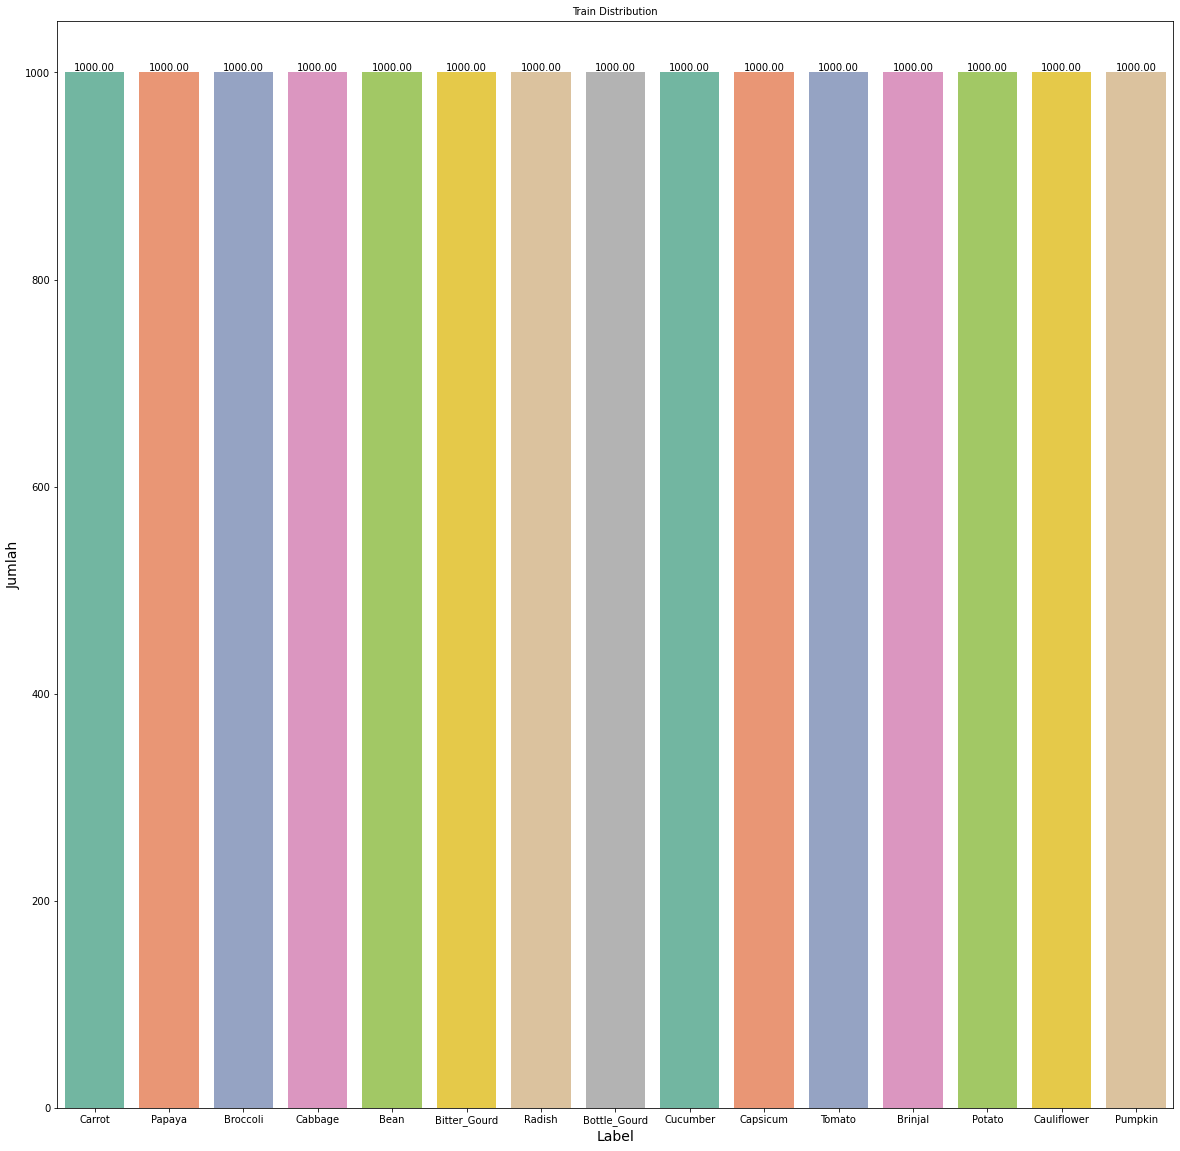

In [ ]:
def visualize_data(dataframe, label):
    fig, ax = plt.subplots(figsize =(20, 20))
    ax = sns.countplot(x='label', data=dataframe, palette='Set2')
    ax.set_title('Data Distribution')
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
    # Setting the label for x-axis
    plt.xlabel("Label", size=14)
    # Setting the label for y-axis
    plt.ylabel("Jumlah", size=14)
    # plt title base on name of 
    plt.title(f"{label} Distribution", size=10)
    plt.show()

visualize_data(train_df, 'Train')

Terlihat bahwa trainset pada setiap kategori data yang digunakan memiliki 1000 data.

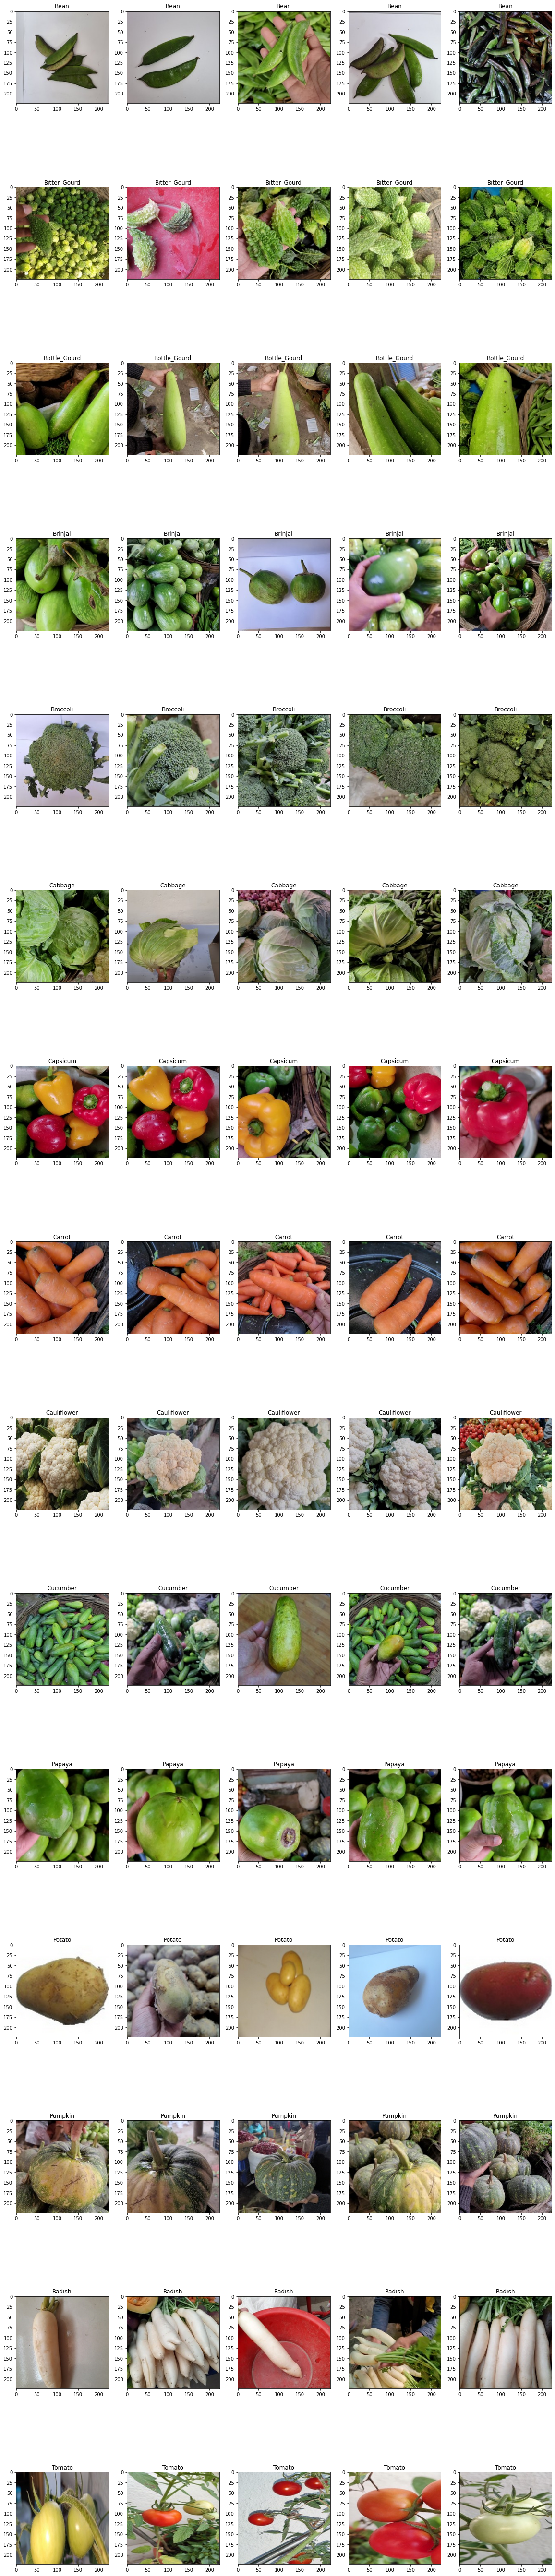

In [ ]:
bean_sample = (train_df[train_df['label']=='Bean']['images'].iloc[:5]).tolist()
bitgourd_sample = (train_df[train_df['label']=='Bitter_Gourd']['images'].iloc[:5]).tolist()
botgourd_sample = (train_df[train_df['label']=='Bottle_Gourd']['images'].iloc[:5]).tolist()
brinjal_sample = (train_df[train_df['label']=='Brinjal']['images'].iloc[:5]).tolist()
broccoli_sample = (train_df[train_df['label']=='Broccoli']['images'].iloc[:5]).tolist()
cab_sample = (train_df[train_df['label']=='Cabbage']['images'].iloc[:5]).tolist()
cap_sample = (train_df[train_df['label']=='Capsicum']['images'].iloc[:5]).tolist()
car_sample = (train_df[train_df['label']=='Carrot']['images'].iloc[:5]).tolist()
cauliflower_sample = (train_df[train_df['label']=='Cauliflower']['images'].iloc[:5]).tolist()
cucumber_sample = (train_df[train_df['label']=='Cucumber']['images'].iloc[:5]).tolist()
papaya_sample = (train_df[train_df['label']=='Papaya']['images'].iloc[:5]).tolist()
potato_sample = (train_df[train_df['label']=='Potato']['images'].iloc[:5]).tolist()
pumpkin_sample = (train_df[train_df['label']=='Pumpkin']['images'].iloc[:5]).tolist()
radish_sample = (train_df[train_df['label']=='Radish']['images'].iloc[:5]).tolist()
tomato_sample = (train_df[train_df['label']=='Tomato']['images'].iloc[:5]).tolist()


def visualize_samples(samples):
  fig, ax = plt.subplots(nrows=15, ncols=5, figsize=(20,100))
  for i, sample in enumerate(samples):
    img = cv2.imread(sample)
    ax[i//5, i%5].set_title(sample.split('/')[-2])
    ax[i//5, i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

visualize_samples(bean_sample + bitgourd_sample + botgourd_sample + brinjal_sample + broccoli_sample + cab_sample + cap_sample + car_sample + cauliflower_sample 
                  + cucumber_sample + papaya_sample + potato_sample + pumpkin_sample + radish_sample + tomato_sample) 

Dari visualisasi data diatas dapat diketahui bahwa : 
1. Ukuran tiap gambar yaitu 200 x 200
2. Warna dari tiap gambar memiliki dominan warna hijau dan putih.
3. Di beberapa kategori seperti carrot dan capsicum memiliki warna oranye dan merah.

Adapun kategori dari vegetable dalam dataset ini adalah :
1. Bean
2. Bitter Gourd
3. Bottle Gourd
4. Brinjal
5. Broccoli
6. Cabbage
7. Capsicum
8. Carrot
9. Cauliflower
10. Cucumber
11. Papaya
12. Potato
13. Pumpkin
14. Radish
15. Potato


# 4. Augmentasi Data

In [ ]:
img_height = 200
img_width = 200
SEED = 1
BATCH = 128

Pendefinisian standarisasi untuk data yang akan dikelola dalam pemodelan

In [ ]:
# Defining the augmentation and rescaling settings for our train set.
train_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

# Defining the rescaling settings for our Validation and Test sets. 
val_aug = ImageDataGenerator(rescale=1./255)
test_aug = ImageDataGenerator(rescale=1./255)

In [ ]:
ds_train = train_aug.flow_from_dataframe(
    dataframe=train_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=SEED)

ds_val = val_aug.flow_from_dataframe(
    dataframe=val_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=False,
    seed=SEED)

ds_test = test_aug.flow_from_dataframe(
    dataframe=test_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=False,
    seed=SEED)

In [93]:
ds_train.class_indices

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

Pembagian kategori ke dalam label-label agar memudahkan mesin dalam proses prediksi

# 5. Model Definition

In [ ]:
callbacks1 = [
    EarlyStopping(monitor='val_loss', patience= 3),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
    #ReduceLRonPlateau
]

- model checkpoint digunakan untuk menyimpan model terbaik.
- early stopping digunakan untuk berhenti menjalankan epoch ketika val_loss tidak membaik setelah 3 epoch.

In [ ]:
# Defining number of output neurons.
num_classes = 15

In [ ]:

# Model architecture
model = Sequential([
    layers.InputLayer(input_shape=(img_height,img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

- MaxPooling2D adalah operasi pooling atau penyatuan maksimal yang menghitung nilai terbesar atau maksimal pada setiap patch dan feature map. Hasilnya akan diambil sampelnya, atau akan menggabungkan peta fitur yang menyorot fitur paling banyak yang berisi rata-rata fitur dari rata-rata kumpulan fitur. MaxPooling bekerja dengan baik dalam pengumpulan rata-rata untuk computer vision.

- Conv2D adalah Lapisan Konvolusi 2D, lapisan ini membuat kernel konvolusi yang merupakan kernel dengan masukan layer yang membantu menghasilkan tensor outputs.

Referensi : 
- https://www.educba.com/keras-maxpooling2d/
- https://www.geeksforgeeks.org/keras-conv2d-class/

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

Hasil dari pemodelan dengan total params 5,145,647

# Model Training

In [ ]:

history = model.fit(
    ds_train,
    batch_size = BATCH,
    validation_data=ds_val,
    epochs=20,
    callbacks=callbacks1
)

Epoch 1/20
118/118 [==============================] - 148s 1s/step - loss: 1.8296 - accuracy: 0.3828 - val_loss: 1.1721 - val_accuracy: 0.6000
Epoch 2/20
118/118 [==============================] - 139s 1s/step - loss: 1.0271 - accuracy: 0.6587 - val_loss: 0.7914 - val_accuracy: 0.7237
Epoch 3/20
118/118 [==============================] - 139s 1s/step - loss: 0.7507 - accuracy: 0.7529 - val_loss: 0.8085 - val_accuracy: 0.7347
Epoch 4/20
118/118 [==============================] - 140s 1s/step - loss: 0.6026 - accuracy: 0.8023 - val_loss: 0.4954 - val_accuracy: 0.8457
Epoch 5/20
118/118 [==============================] - 139s 1s/step - loss: 0.5126 - accuracy: 0.8346 - val_loss: 0.3938 - val_accuracy: 0.8747
Epoch 6/20
118/118 [==============================] - 140s 1s/step - loss: 0.4219 - accuracy: 0.8663 - val_loss: 0.3621 - val_accuracy: 0.8797
Epoch 7/20
118/118 [==============================] - 140s 1s/step - loss: 0.3856 - accuracy: 0.8759 - val_loss: 0.2910 - val_accuracy: 0.9040

In [49]:
# Freezing the model to disallow training of this particular model in concurrent steps.
model.trainable = False

# 6. Model Evaluation

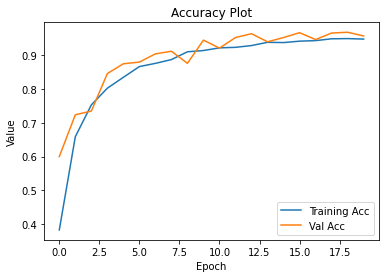

In [50]:
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Plot')
plt.ylabel('Value') 
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Dapat dilihat bahwa Model sudah sangat bagus, dengan setiap epoch tambahan akurasinya meningkat. Baik pelatihan dan akurasi val saling terkait, dapat disimpulkan bahwa model ini tidak overfit.


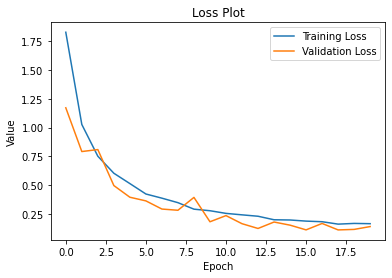

In [51]:
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

Dengan setiap epoch tambahan, loss semakin lama semakin berkurang. Baik training loss dan val loss saling terkait, dapat disimpulkan bahwa model ini tidak overfit.

In [52]:
val_results = model.evaluate(ds_test, verbose=0)
print(f'Validation Loss - Sequential API : {val_results[0]:.4f}')
print(f'Validation Accuracy - Sequential API : {val_results[1]:.4f}')
print('')
test_result = model.evaluate(ds_test)
print('Test Loss - Sequential API : ', test_result[0])
print('Test Accuracy - Sequential API : ', test_result[1])


Validation Loss - Sequential API : 0.1320
Validation Accuracy - Sequential API : 0.9590

24/24 [==============================] - 6s 226ms/step - loss: 0.1320 - accuracy: 0.9590
Test Loss - Sequential API :  0.13197678327560425
Test Accuracy - Sequential API :  0.9589999914169312


Diketahui bahwa Loss dari model adalah sebesar 0.132 dan accuracy nya sebesar 0.96

In [ ]:
ds_test.class_indices

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

In [53]:
test_evaluation = test_df.copy()

In [54]:
test_evaluation.loc[test_evaluation['label']== 'Bean', 'label'] = 0
test_evaluation.loc[test_evaluation['label']== 'Bitter_Gourd', 'label'] = 1
test_evaluation.loc[test_evaluation['label']== 'Bottle_Gourd', 'label'] = 2
test_evaluation.loc[test_evaluation['label']== 'Brinjal', 'label'] = 3
test_evaluation.loc[test_evaluation['label']== 'Broccoli', 'label'] = 4
test_evaluation.loc[test_evaluation['label']== 'Cabbage', 'label'] = 5
test_evaluation.loc[test_evaluation['label']== 'Capsicum', 'label'] = 6
test_evaluation.loc[test_evaluation['label']== 'Carrot', 'label'] = 7
test_evaluation.loc[test_evaluation['label']== 'Cauliflower', 'label'] = 8
test_evaluation.loc[test_evaluation['label']== 'Cucumber', 'label'] = 9
test_evaluation.loc[test_evaluation['label']== 'Papaya', 'label'] = 10
test_evaluation.loc[test_evaluation['label']== 'Potato', 'label'] = 11
test_evaluation.loc[test_evaluation['label']== 'Pumpkin', 'label'] = 12
test_evaluation.loc[test_evaluation['label']== 'Radish', 'label'] = 13
test_evaluation.loc[test_evaluation['label']== 'Tomato', 'label'] = 14

Pelabelan tiap kategori nya, karena kategori masih dalam bentuk object.

In [55]:
# Converting object to integer. 
test_evaluation['label'] = test_evaluation['label'].astype(int)
test_evaluation.dtypes

images    object
label      int64
dtype: object

Merubah kategori menjadi integer yang sebelum nya adalah object

In [56]:
test_evaluation

images  label
0     /content/images/Vegetable Images/test/Cucumber...      9
1     /content/images/Vegetable Images/test/Papaya/1...     10
2     /content/images/Vegetable Images/test/Capsicum...      6
3     /content/images/Vegetable Images/test/Carrot/1...      7
4     /content/images/Vegetable Images/test/Cabbage/...      5
...                                                 ...    ...
2995  /content/images/Vegetable Images/test/Radish/1...     13
2996  /content/images/Vegetable Images/test/Broccoli...      4
2997  /content/images/Vegetable Images/test/Cabbage/...      5
2998  /content/images/Vegetable Images/test/Bitter_G...      1
2999  /content/images/Vegetable Images/test/Cabbage/...      5

[3000 rows x 2 columns]

Hasil setelah pelabelan tiap kategori

In [57]:
nb_classes = 15
targets = np.array(test_evaluation['label']).reshape(-1)
test_final = np.eye(nb_classes)[targets]

In [58]:
test_final

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
pred = model.predict(ds_test)
pred = (pred > 0.5)

24/24 [==============================] - 6s 238ms/step


In [60]:
print(classification_report(test_final, pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       200
           1       0.91      0.98      0.94       200
           2       0.99      0.92      0.95       200
           3       0.93      0.94      0.94       200
           4       0.97      0.89      0.92       200
           5       0.99      0.90      0.94       200
           6       1.00      0.98      0.99       200
           7       1.00      0.97      0.99       200
           8       0.95      0.95      0.95       200
           9       0.95      0.97      0.96       200
          10       0.97      0.94      0.95       200
          11       0.99      0.97      0.98       200
          12       0.92      0.98      0.95       200
          13       0.99      0.99      0.99       200
          14       0.96      0.95      0.96       200

   micro avg       0.97      0.95      0.96      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97   

Metriks yang digunakan pada dataset kali ini adalah f1-score, karena f1-score adalah harmonic mean dari precision dan recall. Untuk memprediksi sayuran adalah benar atau salah, dibutuhkan nilai false negatif dan false positif. Dari f1 score semua kategori dapat dilihat bahwa rata-rata nilai nya 0.96, dimana nilai tersebut sudah cukup baik untuk suatu model.

Referensi : 
- https://www.teknologi-bigdata.com/2020/05/validitas-rapid-test-covid-19-akurasi-accuracy-vs-f1-score.html

# 7. Model Improvements (Transfer Learning)

Pada model improvement kali ini ditambahkan patience menjadi 4, dan menggunakan optimizer adamax dimana menurut dokumentasi, Adamax lebih baik dari Adam terutama untuk model berdasarkan embeddings.

Referensi : 
- https://www.kaggle.com/questions-and-answers/152903
- https://keras.io/api/optimizers/adamax/

In [61]:
# transfer learning

# callback2
callbacks2 = [
    EarlyStopping(monitor='val_loss', patience= 4),
    ModelCheckpoint('model_best2.hdf5', monitor='val_loss', save_best_only=True)
]

In [62]:
model_improvement = Sequential([
    layers.InputLayer(input_shape=(img_height,img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [63]:
model_improvement.compile(optimizer='adamax',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [64]:
model_improvement.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 25, 25, 64)      

In [65]:
history2 = model_improvement.fit(
    ds_train,
    validation_data=ds_val,
    epochs=30,
    callbacks=callbacks2
)

Epoch 1/30
118/118 [==============================] - 141s 1s/step - loss: 1.7658 - accuracy: 0.4165 - val_loss: 1.2932 - val_accuracy: 0.5667
Epoch 2/30
118/118 [==============================] - 139s 1s/step - loss: 1.1867 - accuracy: 0.6036 - val_loss: 1.0915 - val_accuracy: 0.6077
Epoch 3/30
118/118 [==============================] - 139s 1s/step - loss: 0.9449 - accuracy: 0.6897 - val_loss: 0.7709 - val_accuracy: 0.7493
Epoch 4/30
118/118 [==============================] - 139s 1s/step - loss: 0.8085 - accuracy: 0.7343 - val_loss: 0.6596 - val_accuracy: 0.7870
Epoch 5/30
118/118 [==============================] - 139s 1s/step - loss: 0.6970 - accuracy: 0.7773 - val_loss: 0.5985 - val_accuracy: 0.8033
Epoch 6/30
118/118 [==============================] - 139s 1s/step - loss: 0.6115 - accuracy: 0.8021 - val_loss: 0.5381 - val_accuracy: 0.8200
Epoch 7/30
118/118 [==============================] - 146s 1s/step - loss: 0.5806 - accuracy: 0.8174 - val_loss: 0.5469 - val_accuracy: 0.8190

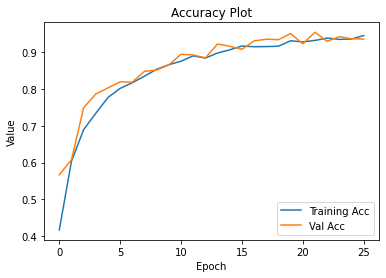

In [66]:
plt.plot(history2.history['accuracy'], label='Training Acc')
plt.plot(history2.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Plot')
plt.ylabel('Value') 
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

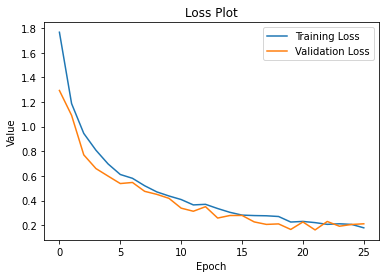

In [67]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [68]:
pred2 = model_improvement.predict(ds_test)
pred2 = (pred2 > 0.5)

24/24 [==============================] - 5s 222ms/step


In [95]:
print(classification_report(test_final, pred2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       200
           1       0.75      0.98      0.85       200
           2       0.98      0.95      0.96       200
           3       0.96      0.86      0.91       200
           4       0.92      0.84      0.88       200
           5       0.93      0.93      0.93       200
           6       0.98      0.97      0.98       200
           7       1.00      0.99      1.00       200
           8       0.97      0.94      0.95       200
           9       0.98      0.91      0.94       200
          10       0.98      0.89      0.93       200
          11       1.00      0.97      0.98       200
          12       0.97      0.89      0.93       200
          13       1.00      1.00      1.00       200
          14       0.97      0.92      0.94       200

   micro avg       0.95      0.93      0.94      3000
   macro avg       0.96      0.93      0.94      3000
weighted avg       0.96   

Dari hasil model improvement dengan menambahkan epoch menjadi 30 dan patience menjadi 4, diketahui bahwa model improvement tidak lebih baik daripada model sebelum di improve. Oleh karena itu, tetap digunakan model sebelum improve untuk mode akhir.

In [70]:
model_improvement.trainable = False

In [71]:
model_improvement.save('model_improve.h5')

# 8. Model Inference

Saving tomato.jpg to tomato.jpg


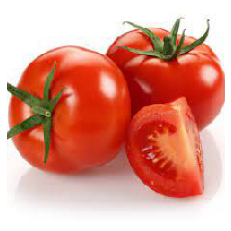

1/1 [==============================] - 0s 145ms/step
[14]
Tomato


In [72]:
import numpy as np
from google.colab import files
# from tf.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(img_height, img_width))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = image.img_to_array(img) # transform image to array
  x = np.expand_dims(x, axis=0) 
  images = np.vstack([x])
  classes = model.predict(images) 
  classes = np.argmax(classes, axis = -1)
  print(classes) 
  if classes[0] == 0:
    print('Bean')
  elif classes[0] == 1:
    print('Bitter_Gourd')
  elif classes[0] == 2:
    print('Bottle_Gourd')
  elif classes[0] == 3:
    print('Brinjal')
  elif classes[0] == 4:
    print('Broccoli')
  elif classes[0] == 5:
    print('Cabbage')
  elif classes[0] == 6:
    print('Capsicum')
  elif classes[0] == 7:
    print('Carrot')
  elif classes[0] == 8:
    print('Cauliflower')
  elif classes[0] == 9:
    print('Cucumber')
  elif classes[0] == 10:
    print('Papaya')
  elif classes[0] == 11:
    print('Potato')
  elif classes[0] == 12:
    print('Pumpkin')
  elif classes[0] == 13:
    print('Radish')
  elif classes[0] == 14:
    print('Tomato')

Model mampu memprediksi tomat dengan benar.

Saving Bitter-Gourd.jpg to Bitter-Gourd.jpg


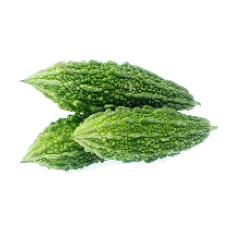

1/1 [==============================] - 0s 15ms/step
[8]
Cauliflower


In [92]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(img_height, img_width))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = image.img_to_array(img) # transform image to array
  x = np.expand_dims(x, axis=0) 
  images = np.vstack([x])
  classes = model.predict(images) 
  classes = np.argmax(classes, axis = -1)
  print(classes) 
  if classes[0] == 0:
    print('Bean')
  elif classes[0] == 1:
    print('Bitter_Gourd')
  elif classes[0] == 2:
    print('Bottle_Gourd')
  elif classes[0] == 3:
    print('Brinjal')
  elif classes[0] == 4:
    print('Broccoli')
  elif classes[0] == 5:
    print('Cabbage')
  elif classes[0] == 6:
    print('Capsicum')
  elif classes[0] == 7:
    print('Carrot')
  elif classes[0] == 8:
    print('Cauliflower')
  elif classes[0] == 9:
    print('Cucumber')
  elif classes[0] == 10:
    print('Papaya')
  elif classes[0] == 11:
    print('Potato')
  elif classes[0] == 12:
    print('Pumpkin')
  elif classes[0] == 13:
    print('Radish')
  elif classes[0] == 14:
    print('Tomato')

Model salah memprediksi, seharusnya gambar yang diinput adalah bitter gourd tetapi model memprediksi nya cauliflower

Saving cauliflower_commodity-page.png to cauliflower_commodity-page.png


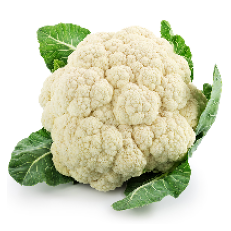

1/1 [==============================] - 0s 15ms/step
[8]
Cauliflower


In [90]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(img_height, img_width))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = image.img_to_array(img) # transform image to array
  x = np.expand_dims(x, axis=0) 
  images = np.vstack([x])
  classes = model.predict(images) 
  classes = np.argmax(classes, axis = -1)
  print(classes) 
  if classes[0] == 0:
    print('Bean')
  elif classes[0] == 1:
    print('Bitter_Gourd')
  elif classes[0] == 2:
    print('Bottle_Gourd')
  elif classes[0] == 3:
    print('Brinjal')
  elif classes[0] == 4:
    print('Broccoli')
  elif classes[0] == 5:
    print('Cabbage')
  elif classes[0] == 6:
    print('Capsicum')
  elif classes[0] == 7:
    print('Carrot')
  elif classes[0] == 8:
    print('Cauliflower')
  elif classes[0] == 9:
    print('Cucumber')
  elif classes[0] == 10:
    print('Papaya')
  elif classes[0] == 11:
    print('Potato')
  elif classes[0] == 12:
    print('Pumpkin')
  elif classes[0] == 13:
    print('Radish')
  elif classes[0] == 14:
    print('Tomato')

Model mampu memprediksi cauliflower dengan benar

# 9. Conclusion

Tujuan proyek ini adalah untuk memprediksi jenis-jenis sayuran. Dengan mengingat hal itu, telah didapatkan dataset sayur-sayuran yang sesuai untuk model prediksi. Dataset ini berisi gambar berbagai jenis sayur-sayuran.


- Class 0 F1-Score : 0.97
- Class 1 F1-Score : 0.94
- Class 2 F1-Score : 0.95
- Class 3 F1-Score : 0.94
- Class 4 F1-Score : 0.92
- Class 5 F1-Score : 0.94
- Class 6 F1-Score : 0.99
- Class 7 F1-Score : 0.99
- Class 8 F1-Score : 0.95
- Class 9 F1-Score : 0.96
- Class 10 F1-Score : 0.95
- Class 11 F1-Score : 0.98
- Class 12 F1-Score : 0.95
- Class 13 F1-Score : 0.99
- Class 14 F1-Score : 0.96


Dari hasil model yang telah dibuat. Pada pemodelan digunakan algoritma Convolutional Neural Network dan kemudian dilakukan model improvement dengan menambahkan patience menjadi 4 dan menggunakan model optimizer adamax. Setelah melakukan pemodelan ternyata, model improvement tidak lebih baik dari base model, oleh karena itu digunakan base model yang memiliki macro avg f1-score sebesar 0,96.

Pada saat pengetesan dengan melakukan upload image, model berhasil memprediksi 2 dari 3 gambar dengan benar, dari hasil ini dapat disimpulkan bahwa masih ada data yang belum bisa terprediksi dengan benar, beberapa hal yang dapat mempengaruhi prediksi ini adalah ambiguitas warna pada sayuran dan bentuk sayuran yang masih mirip satu sama lain yang membuat model salah dalam membaca warna pada sayuran dan bentuk sayuran yang hampir menyerupai satu sama lain, karena hal itu kita menyadari sepenuhnya bahwa masih banyak hal yang harus diperbaiki.

Untuk kedepan nya bagi siapapun yang ingin melakukan pemodelan menggunakan dataset yang saya gunakan, dapat memperbaiki model dengan menambahkan sample data, mencoba menggunakan model optimizer yang lebih baik, dan melakukan trail and error dengan menambahkan layer dan neuron pada model.

